In [ ]:
# Data Pre-Processing || Handling Outliers
🦊 `Notebook by` [Md.Samiul Alim](https://github.com/sami0055)

😋  `Machine Learning Source Codes` [GitHub](https://github.com/sami0055/Machine-Learning)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [11]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [13]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [14]:
y_train.shape,y_test.shape

((712,), (179,))

In [16]:
x_train.isnull().mean()

Age       0.192416
Fare      0.050562
Family    0.000000
dtype: float64

In [23]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()
mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [24]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)
x_train['Fare_median']=x_train['Age'].fillna(median_fare)
x_train['Fare_mean']=x_train['Fare'].fillna(mean_fare)

In [25]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
692,NaN,56.4958,0,28.5,29.807687,14.4,56.4958
385,18.0,73.5000,0,18.0,18.000000,18.0,73.5000
67,19.0,8.1583,0,19.0,19.000000,19.0,8.1583
678,43.0,46.9000,7,43.0,43.000000,43.0,46.9000
119,2.0,31.2750,6,2.0,2.000000,2.0,31.2750


In [26]:
print('Orginal Age Variable Variance: ',x_train['Age'].var())
print('Age Variance after median imputation : ',x_train['Age_median'].var())
print('Age variance after mean imputation: ',x_train['Age_mean'].var())

Orginal Age Variable Variance:  209.8213345359795
Age Variance after median imputation :  169.65772684777005
Age variance after mean imputation:  169.39162591230973


In [28]:
print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', x_train['Fare_mean'].var())

Original Fare variable variance:  2361.450261923351
Fare Variance after median imputation:  206.33305649504626
Fare Variance after mean imputation:  2241.8831600538138


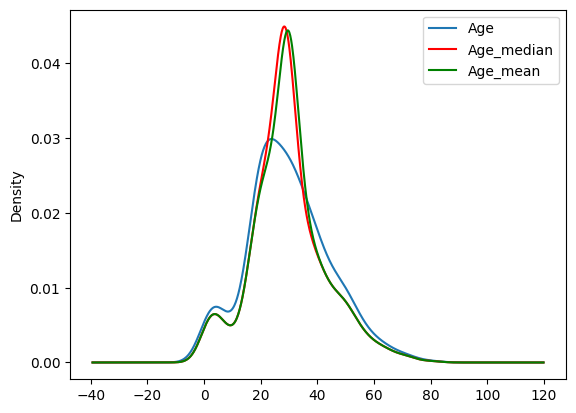

In [35]:
fig=plt.figure()
ax=fig.add_subplot(111)
# Orginal Variable distribution
x_train['Age'].plot(kind='kde',ax=ax)
# variable imputed with the median
x_train['Age_median'].plot(kind='kde',ax=ax,color='red')
# variable imputed with the medina
x_train['Age_mean'].plot(kind='kde',ax=ax,color='green')
#add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

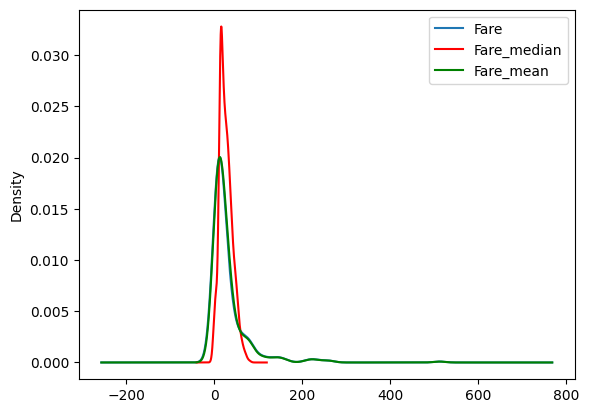

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [41]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,209.821335,84.965330,-6.325421,209.821335,209.821335,209.821335,80.296302
Fare,84.965330,2361.450262,13.498713,70.395128,68.281596,93.184063,2361.450262
Family,-6.325421,13.498713,2.525070,-5.064242,-5.106599,-4.607539,12.815234
Age_median,209.821335,70.395128,-5.064242,169.657727,169.391626,172.526933,66.830817
Age_mean,209.821335,68.281596,-5.106599,169.391626,169.391626,169.391626,64.824300
Fare_median,209.821335,93.184063,-4.607539,172.526933,169.391626,206.333056,88.465883
Fare_mean,80.296302,2361.450262,12.815234,66.830817,64.824300,88.465883,2241.883160


In [42]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.114048,-0.295839,1.000000,1.000000,1.000000,0.111437
Fare,0.114048,1.000000,0.173186,0.110986,0.107744,0.133016,1.000000
Family,-0.295839,0.173186,1.000000,-0.244676,-0.246916,-0.201859,0.170327
Age_median,1.000000,0.110986,-0.244676,1.000000,0.999215,0.922116,0.108364
Age_mean,1.000000,0.107744,-0.246916,0.999215,1.000000,0.906070,0.105193
Fare_median,1.000000,0.133016,-0.201859,0.922116,0.906070,1.000000,0.130072
Fare_mean,0.111437,1.000000,0.170327,0.108364,0.105193,0.130072,1.000000


<Axes: >

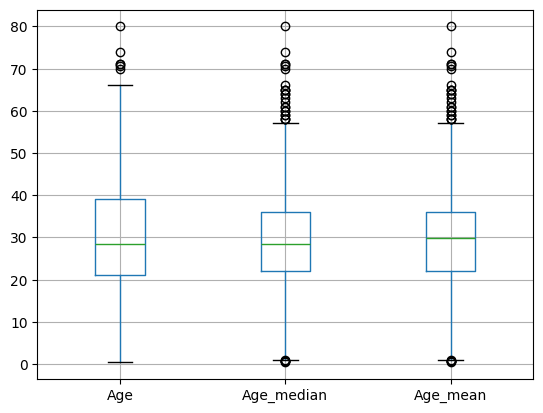

In [43]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

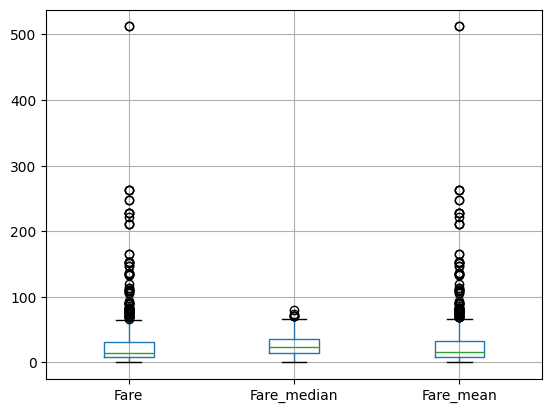

In [45]:
x_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

##  Impute Using Sklearn

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [48]:
x_train.head()

,Age,Fare,Family
692,NaN,56.4958,0
481,NaN,0.0000,0
527,NaN,221.7792,0
855,18.0,9.3500,1
801,31.0,26.2500,2


In [53]:

trf = ColumnTransformer([
    ('imputer1',SimpleImputer(strategy='median'),['Age']),
    ('imputer2',SimpleImputer(strategy='mean'),['Fare'])
],remainder='passthrough')

In [54]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [55]:

trf.named_transformers_['imputer1'].statistics_

array([28.5])

In [56]:

trf.named_transformers_['imputer2'].statistics_

array([31.82782855])

In [57]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [58]:
x_train

array([[ 28.5   ,  56.4958,   0.    ],
       [ 28.5   ,   0.    ,   0.    ],
       [ 28.5   , 221.7792,   0.    ],
       ...,
       [ 48.    ,  34.375 ,   4.    ],
       [ 47.    ,  38.5   ,   0.    ],
       [ 28.5   ,  26.55  ,   0.    ]])

In [59]:
column_names = ['Age', 'Fare', 'Family']

In [64]:
x_train = pd.DataFrame(x_train, columns=column_names)

In [67]:
x_train

,Age,Fare,Family
0,28.5,56.4958,0.0
1,28.5,0.0000,0.0
2,28.5,221.7792,0.0
3,18.0,9.3500,1.0
4,31.0,26.2500,2.0
...,...,...,...
707,28.5,7.8792,0.0
708,35.0,512.3292,0.0
709,48.0,34.3750,4.0
710,47.0,38.5000,0.0


In [69]:
x_test= pd.DataFrame(x_test, columns=column_names)

In [70]:
x_test

,Age,Fare,Family
0,24.0,24.150000,2.0
1,44.0,16.100000,1.0
2,22.0,7.225000,0.0
3,41.0,31.827829,2.0
4,28.5,15.500000,1.0
...,...,...,...
174,25.0,26.000000,1.0
175,20.0,7.854200,0.0
176,28.0,10.500000,0.0
177,23.0,13.791700,0.0
